In [6]:
import pandas as pd

dataframe = pd.read_csv("country_wise_latest.csv" , sep="," )


In [7]:
dataframe.shape

(187, 15)

In [24]:
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain_google_genai.llms import GoogleGenerativeAI
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
%matplotlib inline
load_dotenv()

True

In [25]:
llm = GoogleGenerativeAI(model="gemini-2.0-flash")
agent = create_pandas_dataframe_agent(llm=llm , df=dataframe , allow_dangerous_code=True , verbose=True)

In [26]:
agent.invoke({"input":"What is the shape of the data"})



> Entering new AgentExecutor chain...
Thought: The question asks for the shape of the dataframe `df`. I can use the `.shape` attribute of the dataframe to get the number of rows and columns.
Action: python_repl_ast
Action Input: `df.shape`(187, 15)I have obtained the shape of the dataframe.
Final Answer: (187, 15)

> Finished chain.


{'input': 'What is the shape of the data', 'output': '(187, 15)'}



> Entering new AgentExecutor chain...


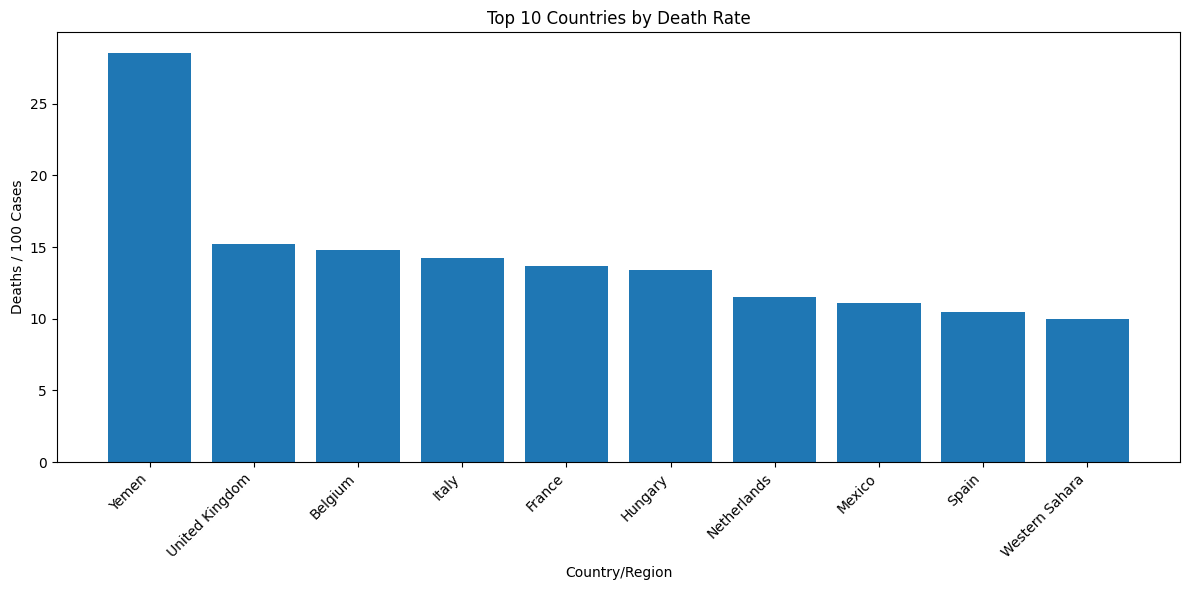

Thought: I need to create a plot showing countries and their death rates. A bar plot would be suitable for this. I'll use the 'Country/Region' and 'Deaths / 100 Cases' columns for the plot. Since there are many countries, I will select the top 10 countries with the highest death rates to make the plot more readable.

Action: python_repl_ast
Action Input: ```python
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined as in the problem description

top_10_deaths = df.nlargest(10, 'Deaths / 100 Cases')

plt.figure(figsize=(12, 6))
plt.bar(top_10_deaths['Country/Region'], top_10_deaths['Deaths / 100 Cases'])
plt.xlabel('Country/Region')
plt.ylabel('Deaths / 100 Cases')
plt.title('Top 10 Countries by Death Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
```Final Answer: The code first selects the top 10 countries with the highest death rates using `nlargest`. Then, it creates a bar plot showing these countries and their corresponding

{'input': 'Plot a suitable plot for the country and their respective death rates',
 'output': 'The code first selects the top 10 countries with the highest death rates using `nlargest`. Then, it creates a bar plot showing these countries and their corresponding death rates, with appropriate labels and title. The x-axis labels are rotated for better readability. Finally, the plot is displayed.'}

In [27]:
agent.invoke({"input":"Plot a suitable plot for the country and their respective death rates"})

81